## **Climate change and it effects**

In [39]:
#importing libraries
import pandas as pd

In [40]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
#from mpl_toolkits.basemap import Basemap
from matplotlib import animation, rc
from IPython.display import HTML

%matplotlib inline 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
import pwlf 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import SplineTransformer, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.svm import SVR

np.seterr(divide='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [ ]:
#reading the data from csv

In [41]:
df_GTemp = pd.read_csv('/Users/nikhilgande/Documents/pdsassignment1/climate_change/data_clean/Dataset/GlobalTemperatures.csv', parse_dates=['dt'])
df_GTemp_cities = pd.read_csv('/Users/nikhilgande/Documents/pdsassignment1/climate_change/data_clean/Dataset/GlobalLandTemperaturesByMajorCity.csv', parse_dates=['dt'])
df_GTemp_Countries = pd.read_csv('/Users/nikhilgande/Documents/pdsassignment1/climate_change/data_clean/Dataset/GlobalLandTemperaturesByCountry.csv',parse_dates=['dt'])


In [42]:
df_GTemp.head(10)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
5,1750-06-01,12.937,1.724,NaN,NaN,NaN,NaN,NaN,NaN
6,1750-07-01,15.868,1.911,NaN,NaN,NaN,NaN,NaN,NaN
7,1750-08-01,14.750,2.231,NaN,NaN,NaN,NaN,NaN,NaN
8,1750-09-01,11.413,2.637,NaN,NaN,NaN,NaN,NaN,NaN
9,1750-10-01,6.367,2.668,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df_GTemp_Countries.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
9,1744-08-01,NaN,NaN,Åland


In [44]:
df_GTemp_cities.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
5,1849-06-01,24.844,1.402,Abidjan,Côte D'Ivoire,5.63N,3.23W
6,1849-07-01,24.058,1.254,Abidjan,Côte D'Ivoire,5.63N,3.23W
7,1849-08-01,23.576,1.265,Abidjan,Côte D'Ivoire,5.63N,3.23W
8,1849-09-01,23.662,1.226,Abidjan,Côte D'Ivoire,5.63N,3.23W
9,1849-10-01,25.263,1.175,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [ ]:
#plotting graph forv avg temperature to understand trend

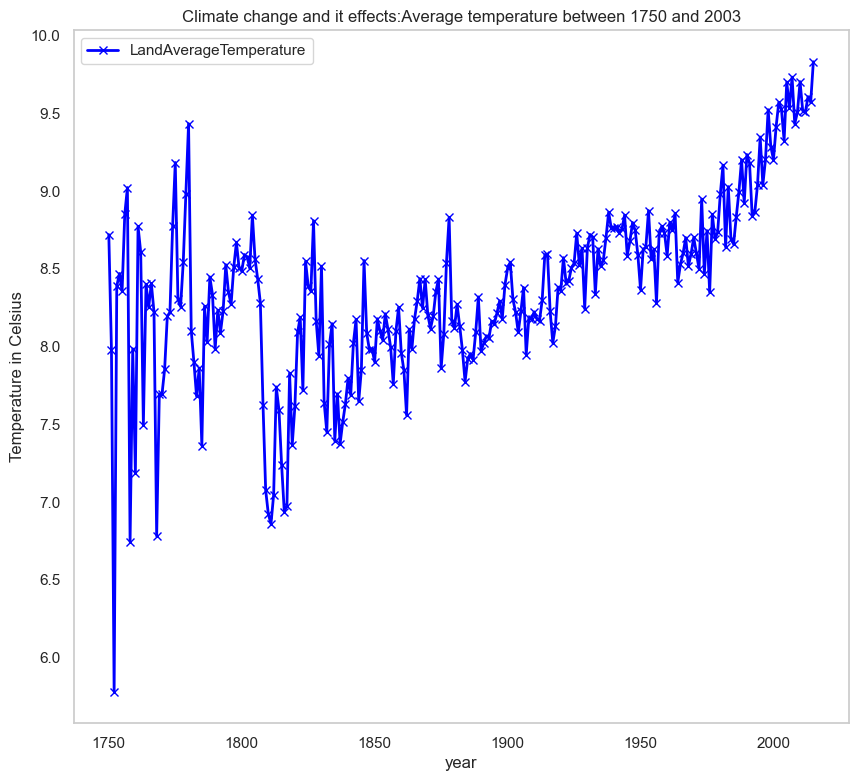

In [45]:
plt.figure (figsize = (10, 9))
temperature_by_year = df_GTemp.groupby(df_GTemp.dt.dt.year).mean()
temperature_by_year.LandAverageTemperature.plot(linewidth=2, color='blue',marker='x')
plt.title('Climate change and it effects:Average temperature between 1750 and 2003')
plt.xlabel('year')
plt.ylabel('Temperature in Celsius')
plt.legend()
plt.grid()
plt.savefig('/Users/nikhilgande/Documents/pdsassignment1/climate_change/results/AvgtempGraph')

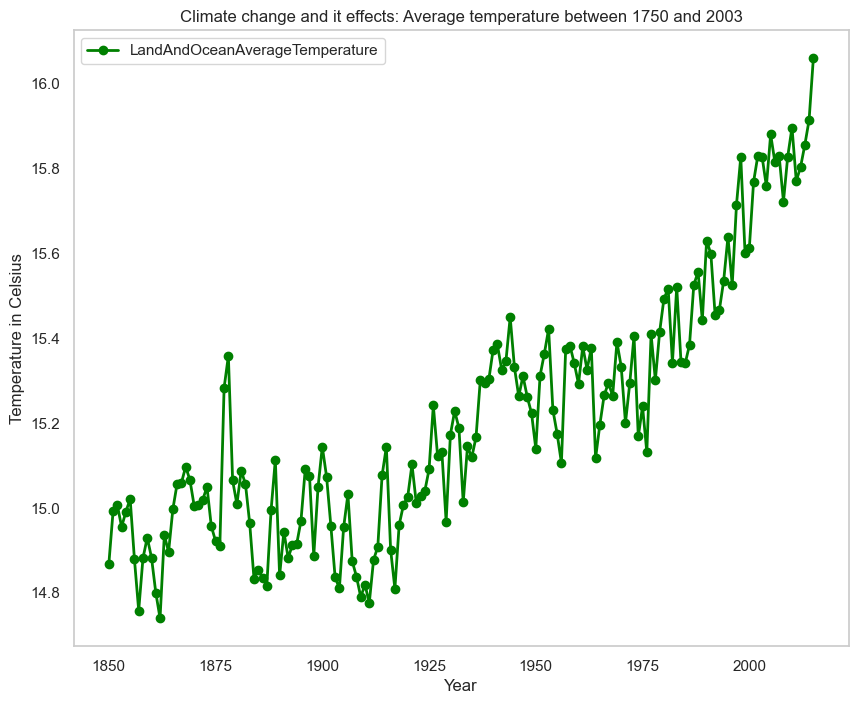

In [47]:
plt.figure (figsize = (10, 8))
temperature_by_year = df_GTemp.groupby(df_GTemp.dt.dt.year).mean()
temperature_by_year.LandAndOceanAverageTemperature.plot(linewidth=2, color='green',marker='o')

plt.title('Climate change and it effects: Average temperature between 1750 and 2003')
plt.xlabel('Year')
plt.ylabel('Temperature in Celsius')
plt.legend()
plt.grid()
plt.savefig('/Users/nikhilgande/Documents/pdsassignment1/climate_change/results/Avglandandocean')

In [ ]:
#plotiing graph for minimum amd maximun temperature changes

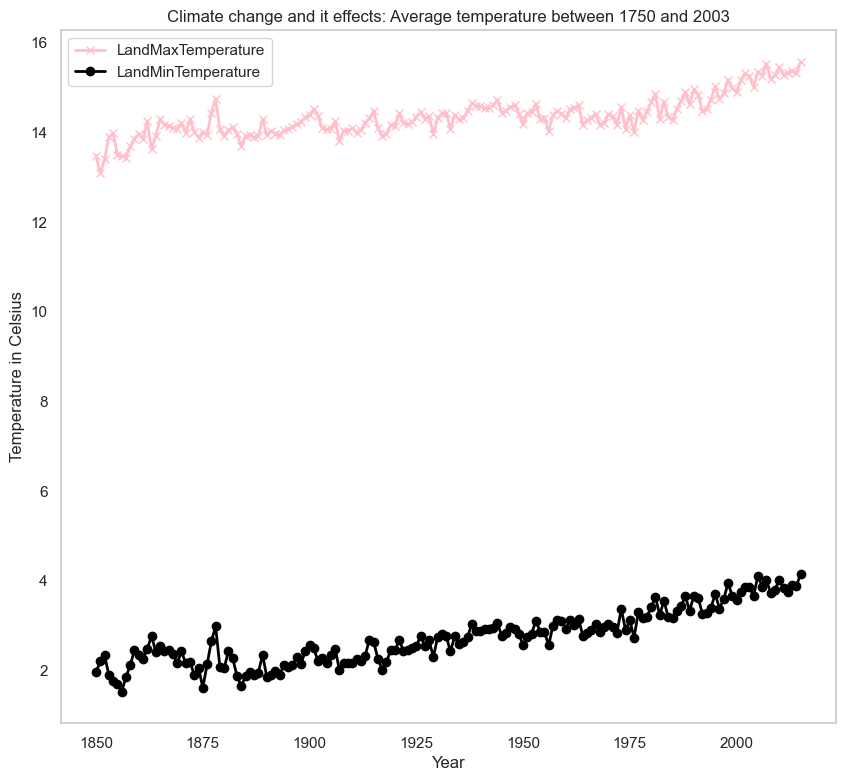

In [48]:
plt.figure (figsize = (10, 9))
temperature_by_year = df_GTemp.groupby(df_GTemp.dt.dt.year).mean()
temperature_by_year.LandMaxTemperature.plot(linewidth=2, color='pink',marker='x')
temperature_by_year.LandMinTemperature.plot(linewidth=2, color='black',marker='o')
plt.title('Climate change and it effects: Average temperature between 1750 and 2003')
plt.xlabel('Year')
plt.ylabel('Temperature in Celsius')
plt.legend()
plt.grid()
plt.savefig('/Users/nikhilgande/Documents/pdsassignment1/climate_change/results/min_and_max_temp')

In [ ]:
plotting graph for tempearure for random 4 cities

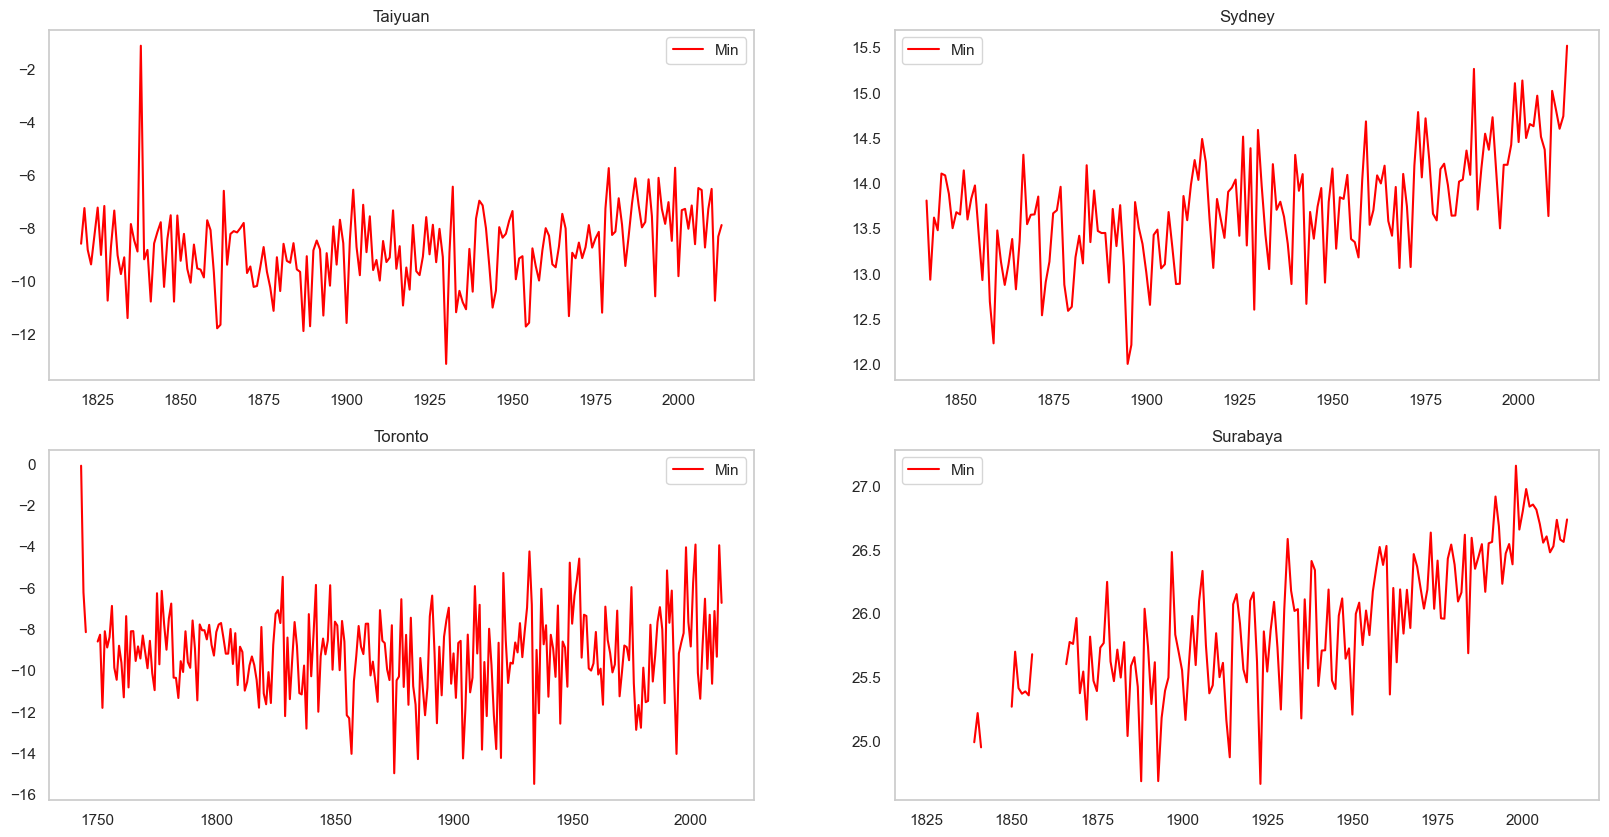

In [50]:
def takeAvg(db, year, name, label):
    return db.groupby([name, year])[label].mean().unstack()

def takeMin(db, year, name, label):
    return db.groupby([name, year])[label].min().unstack()

def takeMax(db, year, name, label):
    return db.groupby([name, year])[label].max().unstack()

year = df_GTemp_cities.dt.dt.year
label = 'AverageTemperature'
cityAvg = takeAvg(df_GTemp_cities, year, 'City', label)
cityMin = takeMin(df_GTemp_cities, year, 'City', label)
cityMax = takeMax(df_GTemp_cities, year, 'City', label)

fig = plt.figure(figsize=(20,10))

subplot = [221,222,223,224]
for index in range(0, 4):
    searchRandom = cityAvg.sample(10).index
    for name_city in searchRandom:
        rowAvg = cityAvg.loc[name_city] 
        rowMin = cityMin.loc[name_city] 
        rowMax = cityMax.loc[name_city] 
    
    ax3 = fig.add_subplot(subplot[index]) 
    ax3.set_title(rowMin.name)
    ax3.grid()
    ax3.plot(rowMin, label="Min",color='red')
    leg = ax3.legend()
    

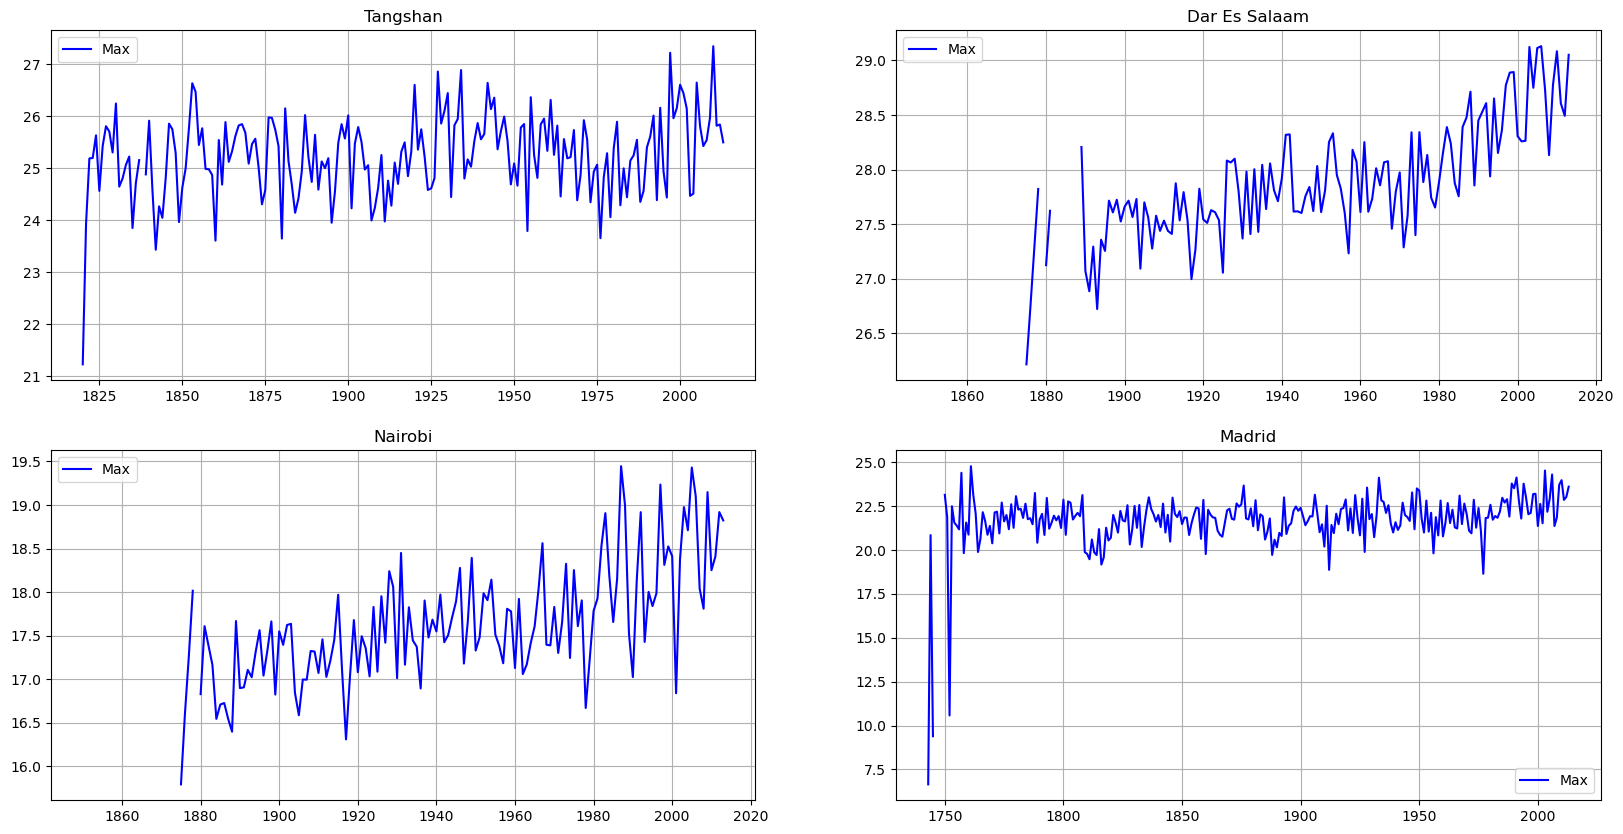

In [14]:
fig = plt.figure(figsize=(20,10))

subplot = [221,222,223,224]
for index in range(0, 4):
    searchRandom = cityAvg.sample(10).index
    for name_city in searchRandom:
        rowAvg = cityAvg.loc[name_city] 
        rowMin = cityMin.loc[name_city] 
        rowMax = cityMax.loc[name_city] 
   
    ax1 = fig.add_subplot(subplot[index]) 
    ax1.set_title(rowMax.name)
    ax1.grid()
    ax1.plot(rowMax, label="Max",color='blue')
    leg = ax1.legend()
    
    
    

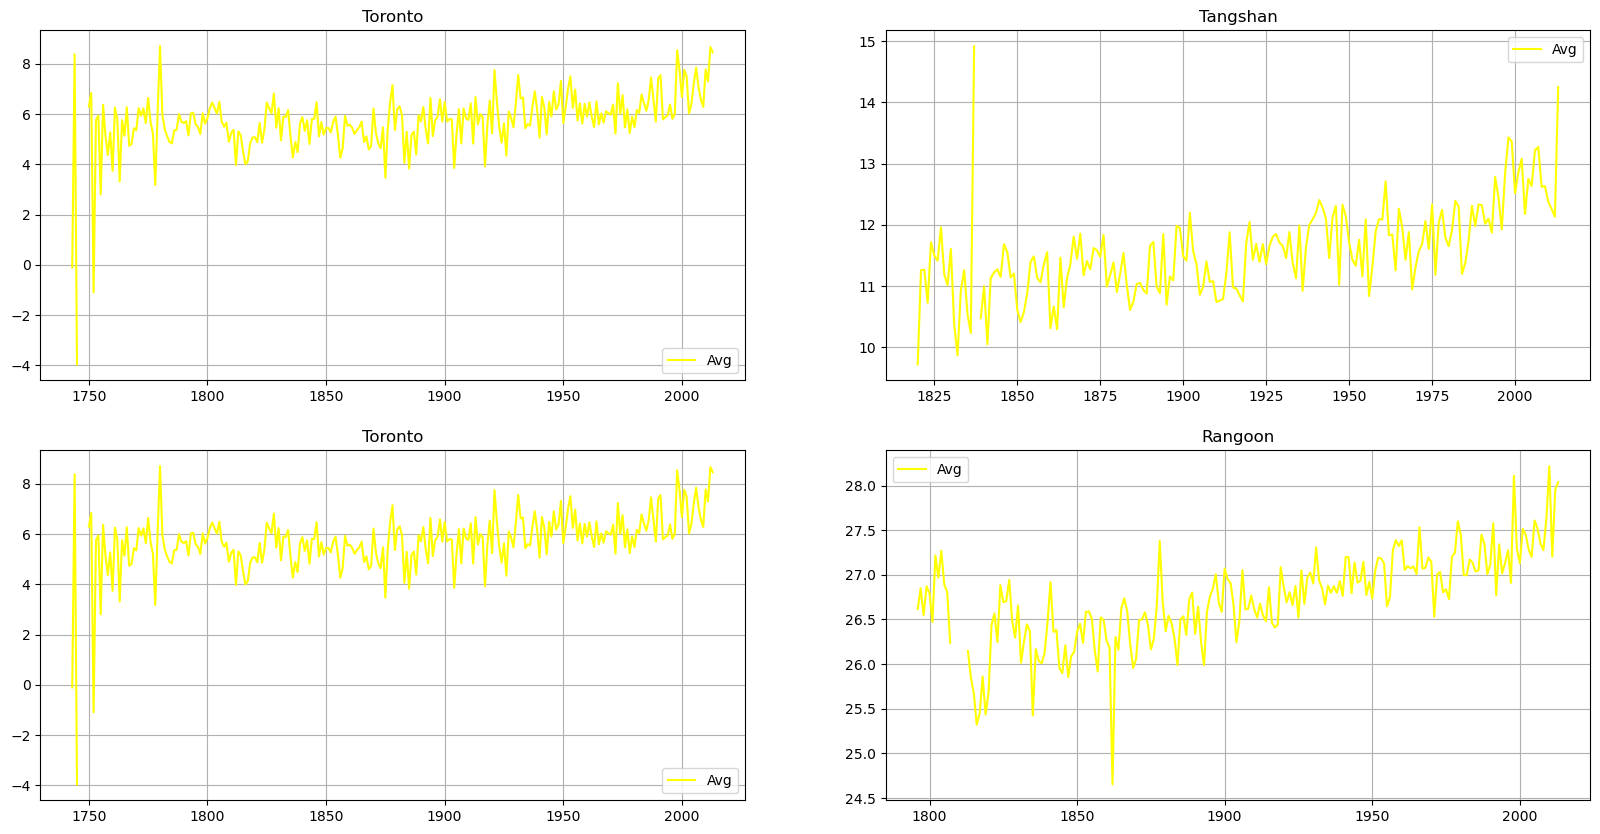

In [15]:
fig = plt.figure(figsize=(20,10))

subplot = [221,222,223,224]
for index in range(0, 4):
    searchRandom = cityAvg.sample(10).index
    for name_city in searchRandom:
        rowAvg = cityAvg.loc[name_city] 
        rowMin = cityMin.loc[name_city] 
        rowMax = cityMax.loc[name_city] 
   
    
    ax2 = fig.add_subplot(subplot[index]) 
    ax2.set_title(rowAvg.name)
    ax2.grid()
    ax2.plot(rowAvg, label="Avg",color='yellow')
    leg = ax2.legend()

In [ ]:
#plotting graph for temperature change for random countries

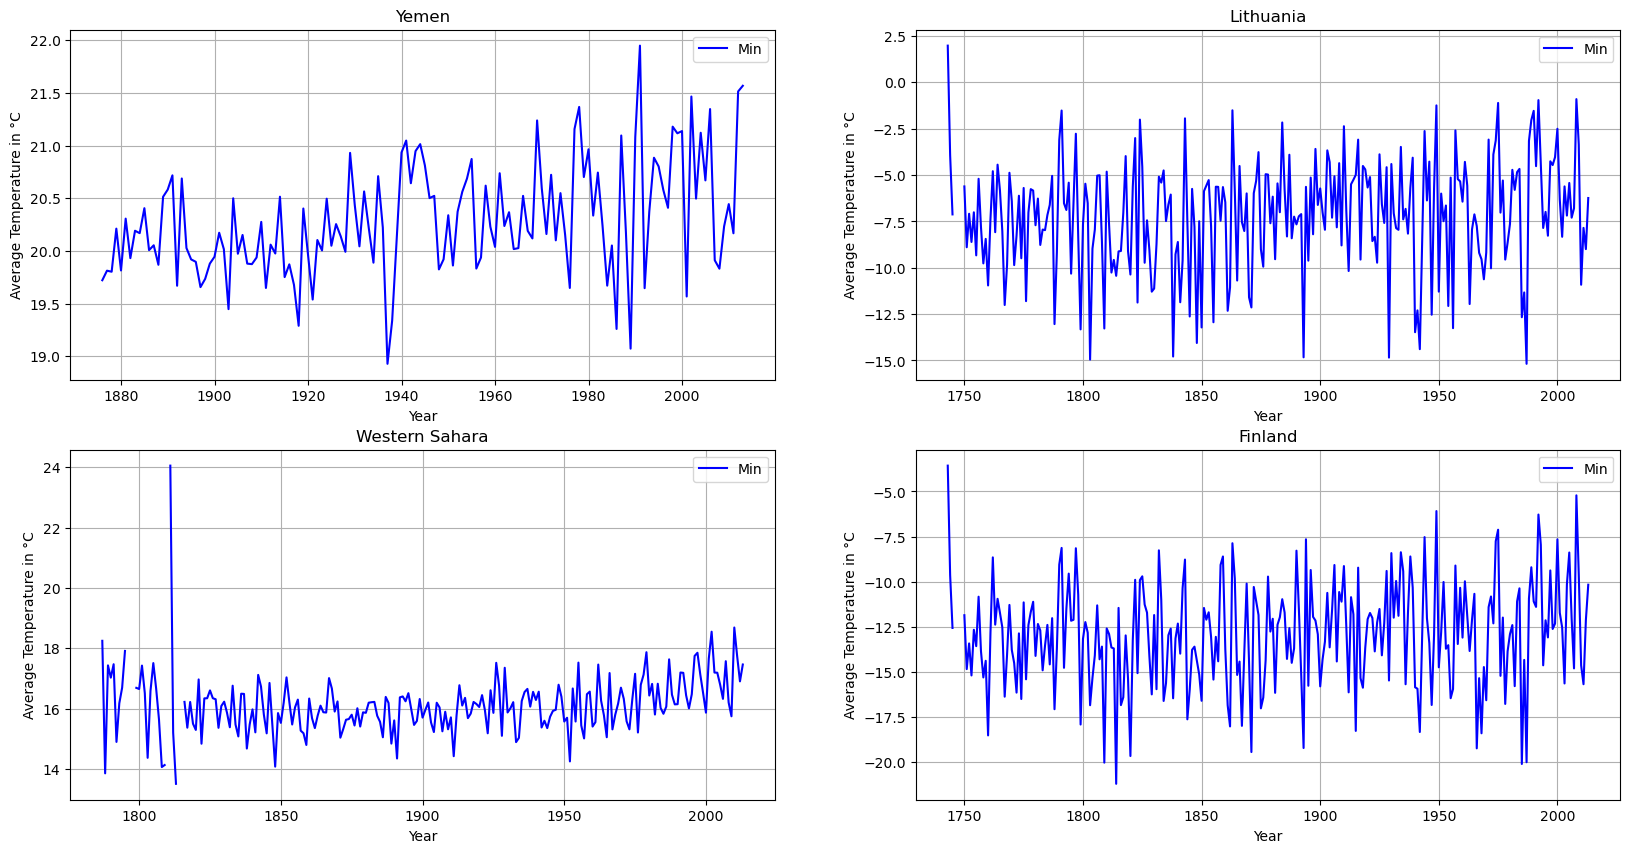

In [16]:
year = df_GTemp_Countries.dt.dt.year
label = 'AverageTemperature'
countryAvg = takeAvg(df_GTemp_Countries, year, 'Country', label)
countryMin = takeMin(df_GTemp_Countries, year, 'Country', label)
countryMax = takeMax(df_GTemp_Countries, year, 'Country', label)

fig = plt.figure(figsize=(20,10))
subplot = [221,222,223,224]
for index in range(0, 4):
    searchRandom = countryAvg.sample(10).index
    for name_country in searchRandom:
        rowAvg = countryAvg.loc[name_country] 
        rowMin = countryMin.loc[name_country] 
        rowMax = countryMax.loc[name_country] 
    
    ax3 = fig.add_subplot(subplot[index]) 
    ax3.set_title(rowMin.name)
    ax3.grid()
    ax3.set_xlabel('Year')
    ax3.set_ylabel('Average Temperature in °C')
    ax3.plot(rowMin, label="Min",color='blue')
    leg = ax3.legend()

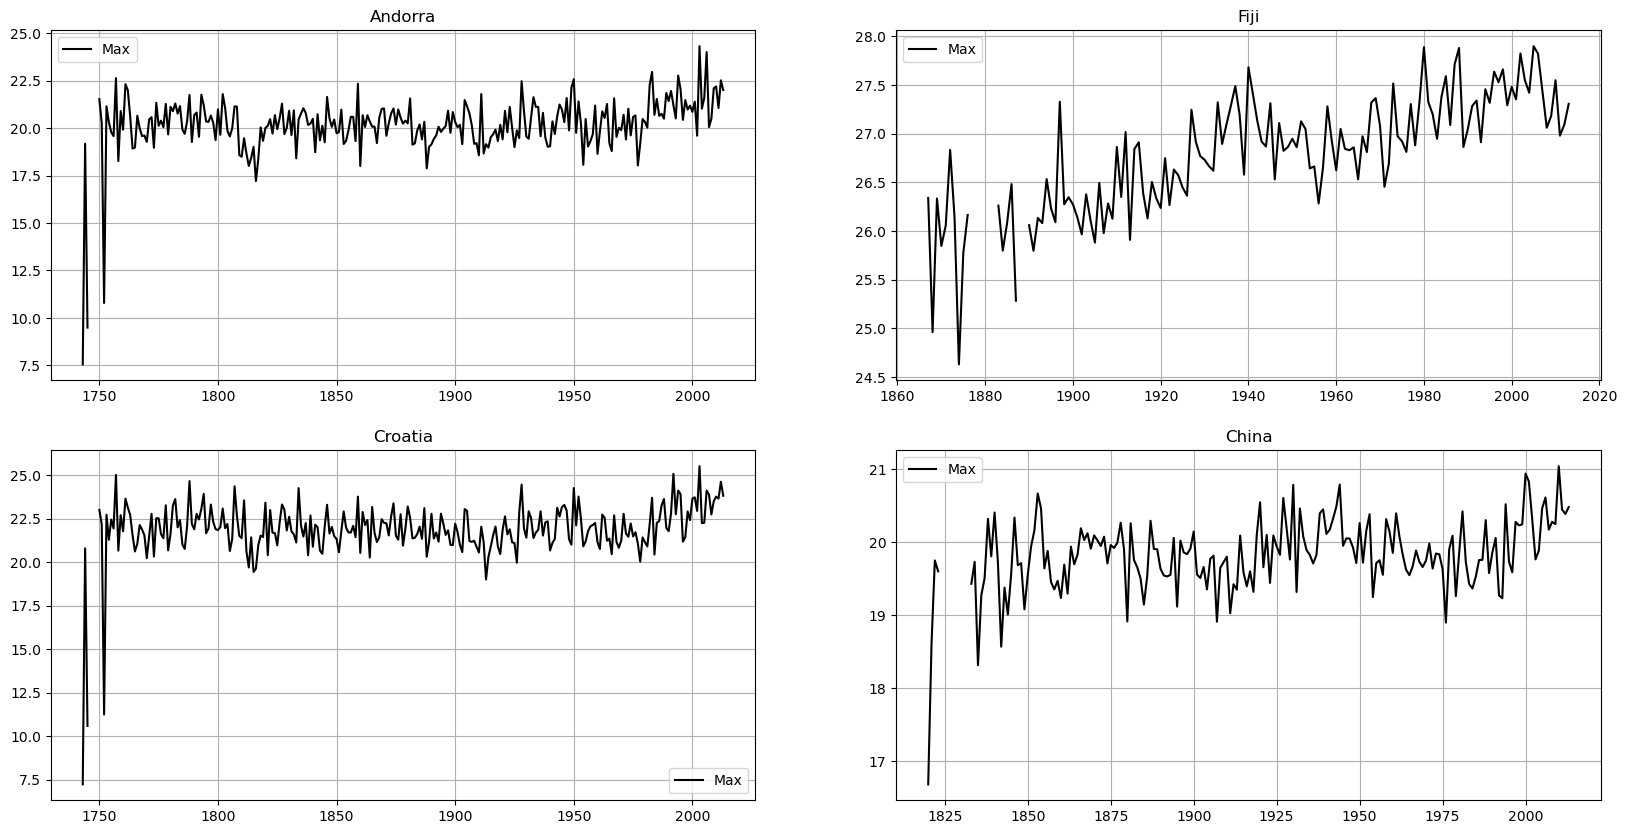

In [17]:
fig = plt.figure(figsize=(20,10))
subplot = [221,222,223,224]
for index in range(0, 4):
    searchRandom = countryAvg.sample(10).index
    for name_country in searchRandom:
        rowAvg = countryAvg.loc[name_country] 
        rowMin = countryMin.loc[name_country] 
        rowMax = countryMax.loc[name_country] 
   
    ax1 = fig.add_subplot(subplot[index]) 
    ax1.set_title(rowMax.name)
    ax1.grid()
    ax1.plot(rowMax, label="Max",color='black')
    leg = ax1.legend()
    
    


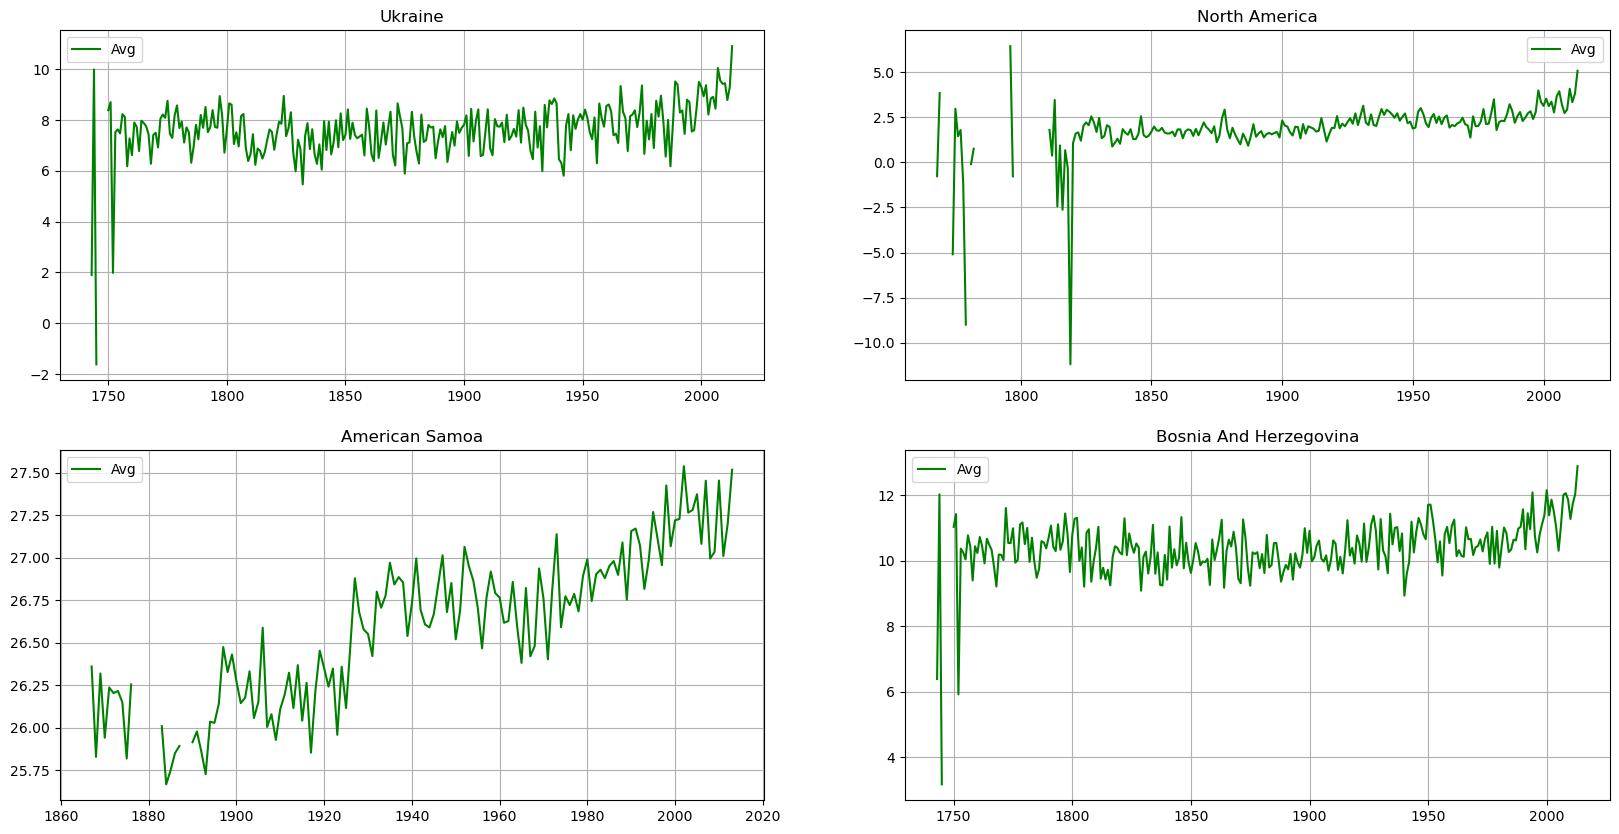

In [18]:
fig = plt.figure(figsize=(20,10))
subplot = [221,222,223,224]
for index in range(0, 4):
    searchRandom = countryAvg.sample(10).index
    for name_country in searchRandom:
        rowAvg = countryAvg.loc[name_country] 
        rowMin = countryMin.loc[name_country] 
        rowMax = countryMax.loc[name_country] 
   
    ax2 = fig.add_subplot(subplot[index]) 
    ax2.set_title(rowAvg.name)
    ax2.grid()
    ax2.plot(rowAvg, label="Avg",color='green')
    leg = ax2.legend()

In [ ]:
#observing temperature chsnges for  northmost countires

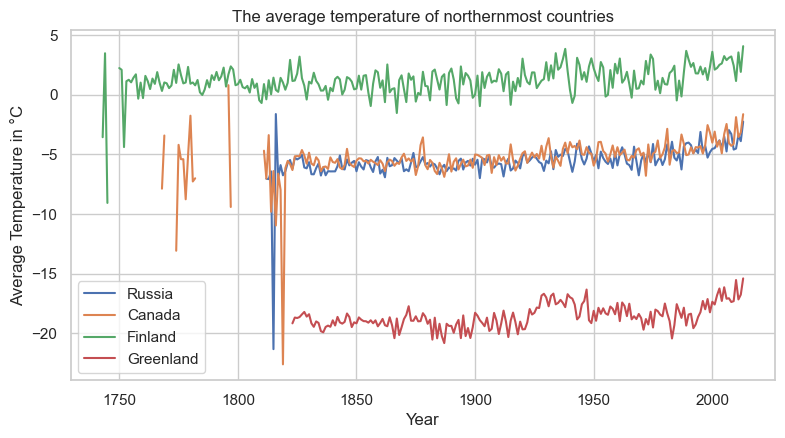

In [52]:
rs = countryAvg.loc['Russia']
cd = countryAvg.loc['Canada']
gl = countryAvg.loc['Greenland']
fd = countryAvg.loc['Finland']

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(221) 
ax1.plot(rs, label="Russia")
ax1.plot(cd, label="Canada")
ax1.plot(fd, label="Finland")
ax1.plot(gl, label="Greenland")
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Temperature in °C')
ax1.set_title("The average temperature of northernmost countries")
plt.savefig('/Users/nikhilgande/Documents/pdsassignment1/climate_change/results/northmost_avg_temp')

leg = ax1.legend()

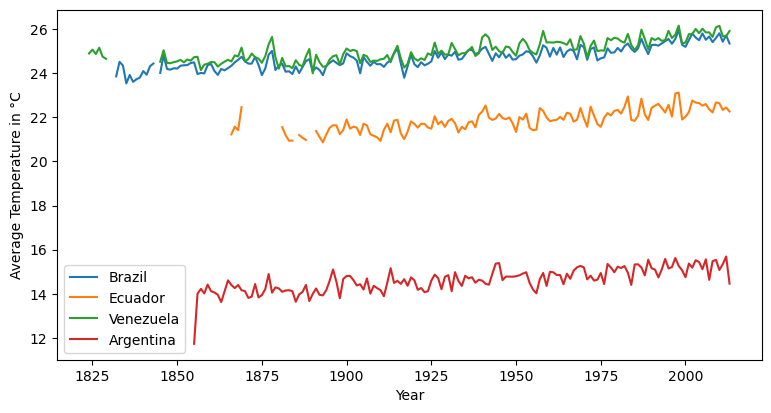

In [20]:
bl = countryAvg.loc['Brazil']
er = countryAvg.loc['Ecuador']
va = countryAvg.loc['Venezuela']
aa = countryAvg.loc['Argentina']

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(221) 
ax1.plot(bl, label="Brazil")
ax1.plot(er, label="Ecuador")
ax1.plot(va, label="Venezuela")
ax1.plot(aa, label="Argentina")
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Temperature in °C')
leg = ax1.legend()

In [ ]:
#poltting graph for seasonal change in temperature

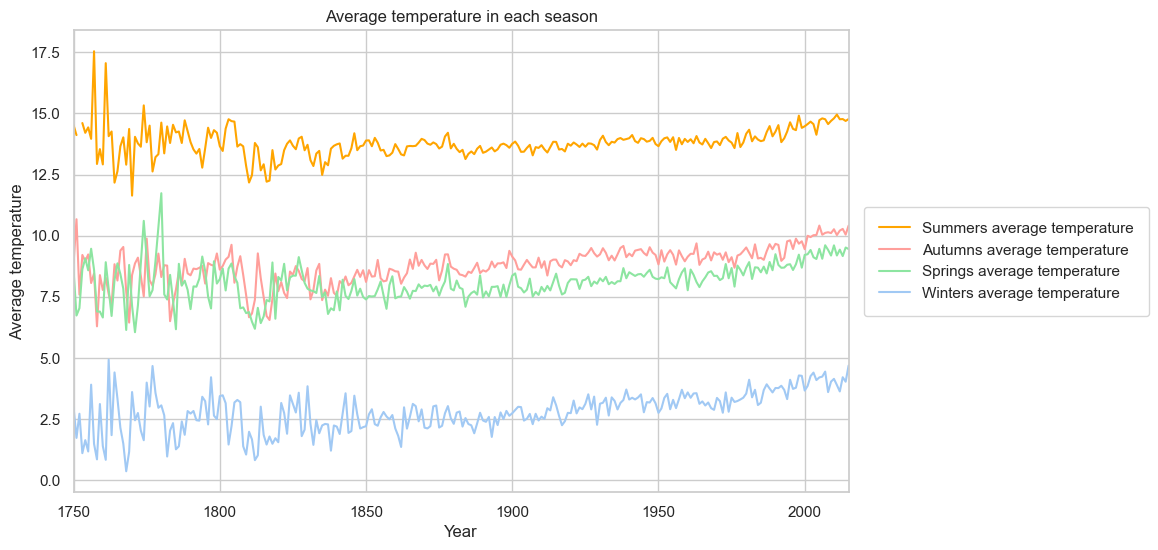

In [53]:
df_GTemp = df_GTemp[['dt', 'LandAverageTemperature']]

df_GTemp['dt'] = pd.to_datetime(df_GTemp['dt'])
df_GTemp['year'] = df_GTemp['dt'].map(lambda x: x.year)
df_GTemp['month'] = df_GTemp['dt'].map(lambda x: x.month)

def takeSeason(mnt):
    if mnt >= 3 and mnt <= 5:
        return 'spring'
    elif mnt >= 6 and mnt <= 8:
        return 'summer'
    elif mnt >= 9 and mnt <= 11:
        return 'autumn'
    else:
        return 'winter'
    
min_year = df_GTemp['year'].min()
max_year = df_GTemp['year'].max()
yrs = range(min_year, max_year + 1)

df_GTemp['season'] = df_GTemp['month'].apply(takeSeason)

TempSpring = []
TempSummer = []
TempAutumn = []
TempWinter = []

for year in yrs:
    curr_yrs_data = df_GTemp[df_GTemp['year'] == year]
    TempSpring.append(curr_yrs_data[curr_yrs_data['season'] == 'spring']['LandAverageTemperature'].mean())
    TempSummer.append(curr_yrs_data[curr_yrs_data['season'] == 'summer']['LandAverageTemperature'].mean())
    TempAutumn.append(curr_yrs_data[curr_yrs_data['season'] == 'autumn']['LandAverageTemperature'].mean())
    TempWinter.append(curr_yrs_data[curr_yrs_data['season'] == 'winter']['LandAverageTemperature'].mean())
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))

plt.plot(yrs, TempSummer, label='Summers average temperature', color='orange')
plt.plot(yrs, TempAutumn, label='Autumns average temperature', color='r')
plt.plot(yrs, TempSpring, label='Springs average temperature', color='g')
plt.plot(yrs, TempWinter, label='Winters average temperature', color='b')

plt.xlim(min_year, max_year)

ax.set_ylabel('Average temperature')
ax.set_xlabel('Year')
ax.set_title('Average temperature in each season')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)
plt.savefig('/Users/nikhilgande/Documents/pdsassignment1/climate_change/results/season_change')


In [ ]:
#plotting graph for countires with highest change in temperature

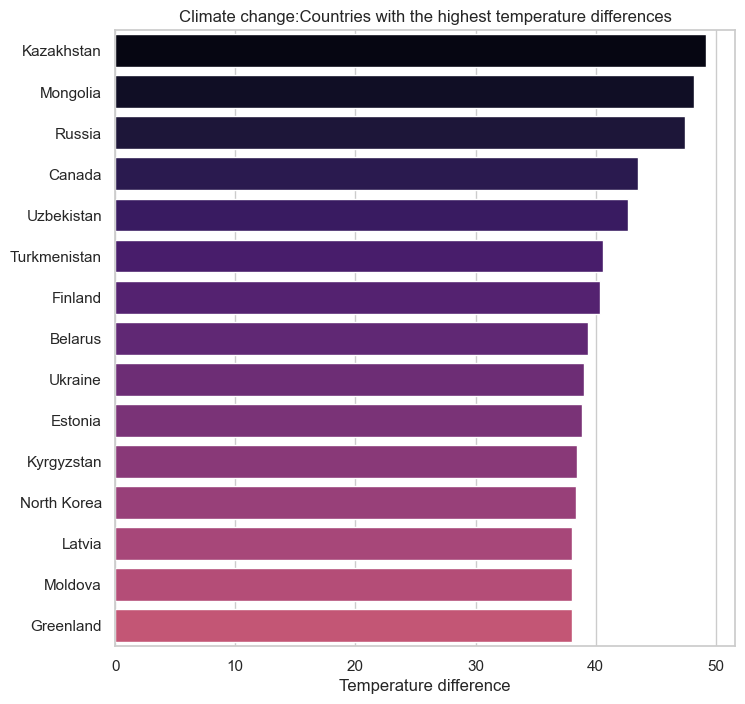

In [56]:
countries = df_GTemp_Countries['Country'].unique()
max_min_list = []

# getting max and min temps
for c in countries:
    curr_temps = df_GTemp_Countries[df_GTemp_Countries['Country'] == c]['AverageTemperature']
    max_min_list.append((curr_temps.max(), curr_temps.min()))
    
# nan cleaning
list_results = []
list_resultCountries = []

for i in range(len(max_min_list)):
    if not np.isnan(max_min_list[i][0]):
        list_results.append(max_min_list[i])
        list_resultCountries.append(countries[i])

# calc dfr        
dfr = []

for tpl in list_results:
    dfr.append(tpl[0] - tpl[1])
    
# sorting
dfr, list_resultCountries = (list(x) for x in zip(*sorted(zip(dfr, list_resultCountries), key=lambda pair: pair[0], reverse=True)))

# ploting
f, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=dfr[:15], y=list_resultCountries[:15], palette=sns.color_palette("magma", 25), ax=ax)

texts = ax.set(ylabel="", xlabel="Temperature difference", title="Climate change:Countries with the highest temperature differences")
plt.savefig('/Users/nikhilgande/Documents/pdsassignment1/climate_change/results/highest_tempchange_countries')

In [55]:
#Now we use latest data
latest_df = df_GTemp_Countries.loc['1980':'2020']
latest_df.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
198000,1961-01-01,10.830,0.339,Gaza Strip
198001,1961-02-01,10.612,0.324,Gaza Strip
198002,1961-03-01,13.087,0.211,Gaza Strip
198003,1961-04-01,17.976,0.378,Gaza Strip
198004,1961-05-01,22.583,0.228,Gaza Strip


global_temp

In [24]:
df_GTemp.index = pd.to_datetime(df_GTemp["dt"])
df_GTemp.index = pd.DatetimeIndex(df_GTemp.index, freq="infer")
y = df_GTemp["LandAverageTemperature"].loc[df_GTemp.index >= "1900"]

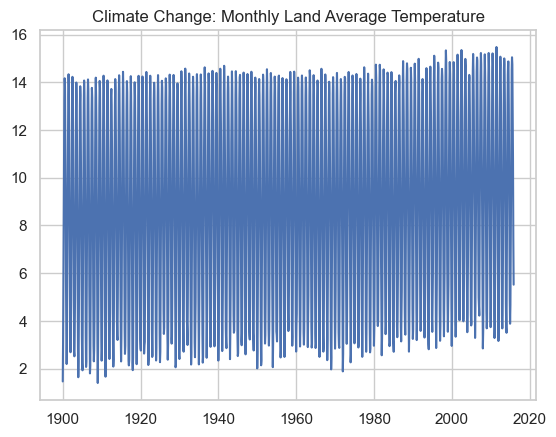

In [25]:
#Removing Seasonality df_GTemp
f, ax = plt.subplots()
ax.plot(y)
ax.set_title("Climate Change: Monthly Land Average Temperature")
plt.show()

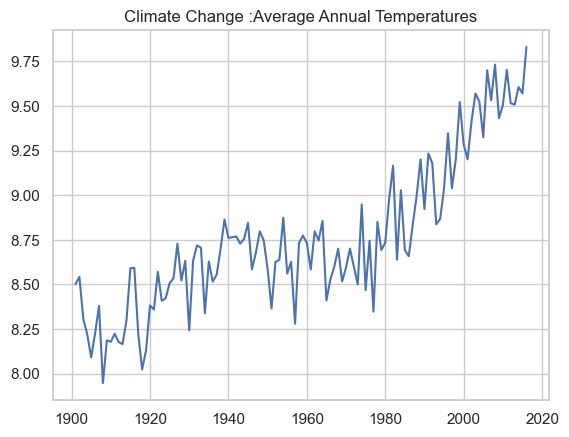

In [26]:
yearly = y.resample("Y").mean()
f, ax = plt.subplots()
ax.plot(yearly)
ax.set_title("Climate Change :Average Annual Temperatures")
plt.show()

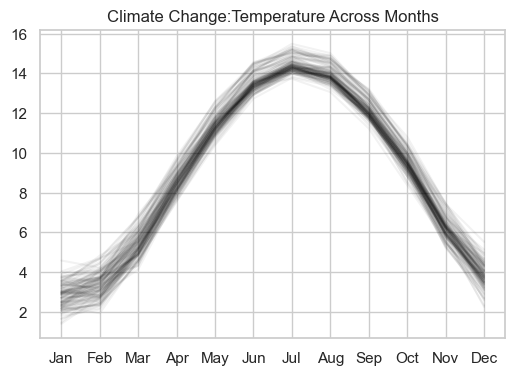

In [27]:
months = ["Jan", "Feb", "Mar",
        "Apr", "May", "Jun",
        "Jul", "Aug", "Sep",
        "Oct", "Nov", "Dec"]

def sortingMonths(series):
    df = pd.DataFrame()
    for i in range(1, 13):
        s =  pd.Series(series.loc[series.index.month == i].values, name="Month {}".format(i))
        df = pd.concat([df, s], axis="columns")

    return df

def plotCurves(month_df):
    f, ax = plt.subplots(figsize=(6, 4))
    for i, r in month_df.iterrows():
        ax.plot(r, color="black", alpha = 0.05)
        ax.set_xticks(range(12))
        ax.set_xticklabels(months)

    ax.set_title("Climate Change:Temperature Across Months")


df = sortingMonths(y)
plotCurves(df)

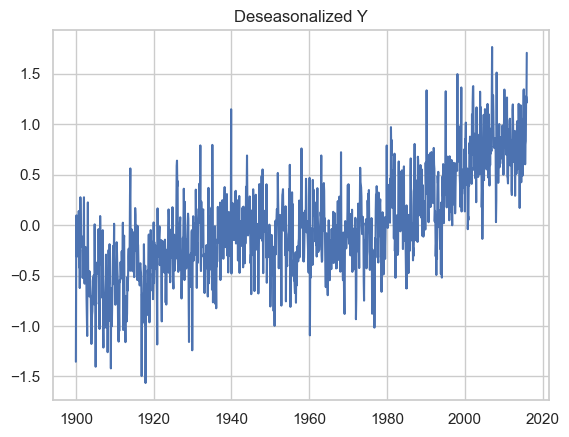

In [28]:
# Deseasonalized
monthly_avg = df.mean(axis="index")
no_seasonality_df = df - monthly_avg
y_temp = pd.Series(np.ravel(no_seasonality_df.values, order="C")).dropna()
y_temp.index = y.index
y = y_temp
f, ax = plt.subplots()
ax.plot(y)
ax.set_title("Deseasonalized Y")
plt.show()